<h1>Tr-OCR by microsoft</h1>

general ocr, not math specific, infact performed poorly for math equations

Encoder:

Uses a Vision Transformer (ViT) to process the input image.

The image is split into small patches, which are embedded and fed as a sequence into the transformer encoder.

The ViT encoder captures rich spatial relationships and visual features from the entire image.

Decoder:

A standard transformer decoder takes the encoded image features and generates the output text in a sequential, autoregressive manner.

The decoder produces the text one character (or token) at a time, attending to both the image context and the previously generated tokens.

End-to-End Training:

TrOCR is trained directly on (image, text) pairs, learning to map entire images to their text representations without explicit intermediate steps like character segmentation or line detection.

Single digital math equation <br>

input-<br>

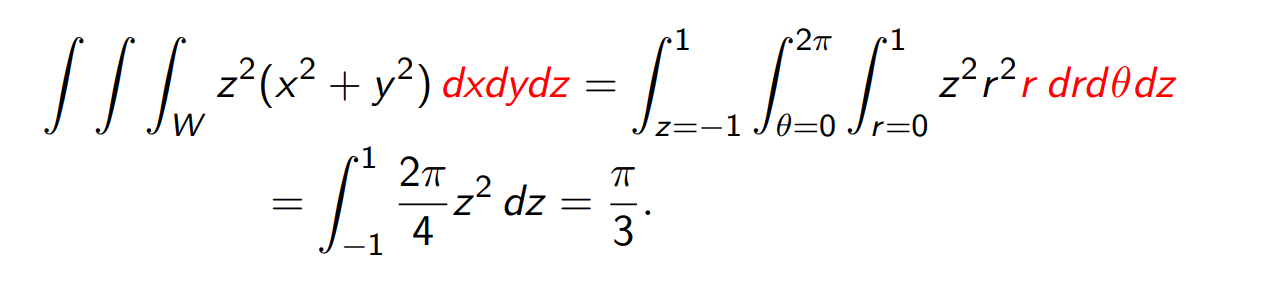

In [3]:
from transformers import (
    TrOCRConfig,
    TrOCRProcessor,
    TrOCRForCausalLM,
    ViTConfig,
    ViTModel,
    VisionEncoderDecoderModel,
)
import requests
from PIL import Image

# If you want to start from the pretrained model, load the checkpoint with `VisionEncoderDecoderModel`
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# load image from the IAM dataset
"""url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
pixel_values = processor(image, return_tensors="pt").pixel_values
text = "industry, ' Mr. Brown commented icily. ' Let us have a"""

img1=Image.open(r'C:\Users\kani1\Desktop\IE643\custom-dataset\iam-handwritten-lines-binarized\test\test_line_02900.png').convert("RGB")
pixel_values = processor(img1, return_tensors="pt").pixel_values

# training
"""model.config.decoder_start_token_id = processor.tokenizer.eos_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size

labels = processor.tokenizer(text, return_tensors="pt").input_ids
outputs = model(pixel_values, labels=labels)
loss = outputs.loss
round(loss.item(), 2)"""

# inference
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


"Yone can't forgive him for this -"

Digital math equation with text <br>

input- <br>
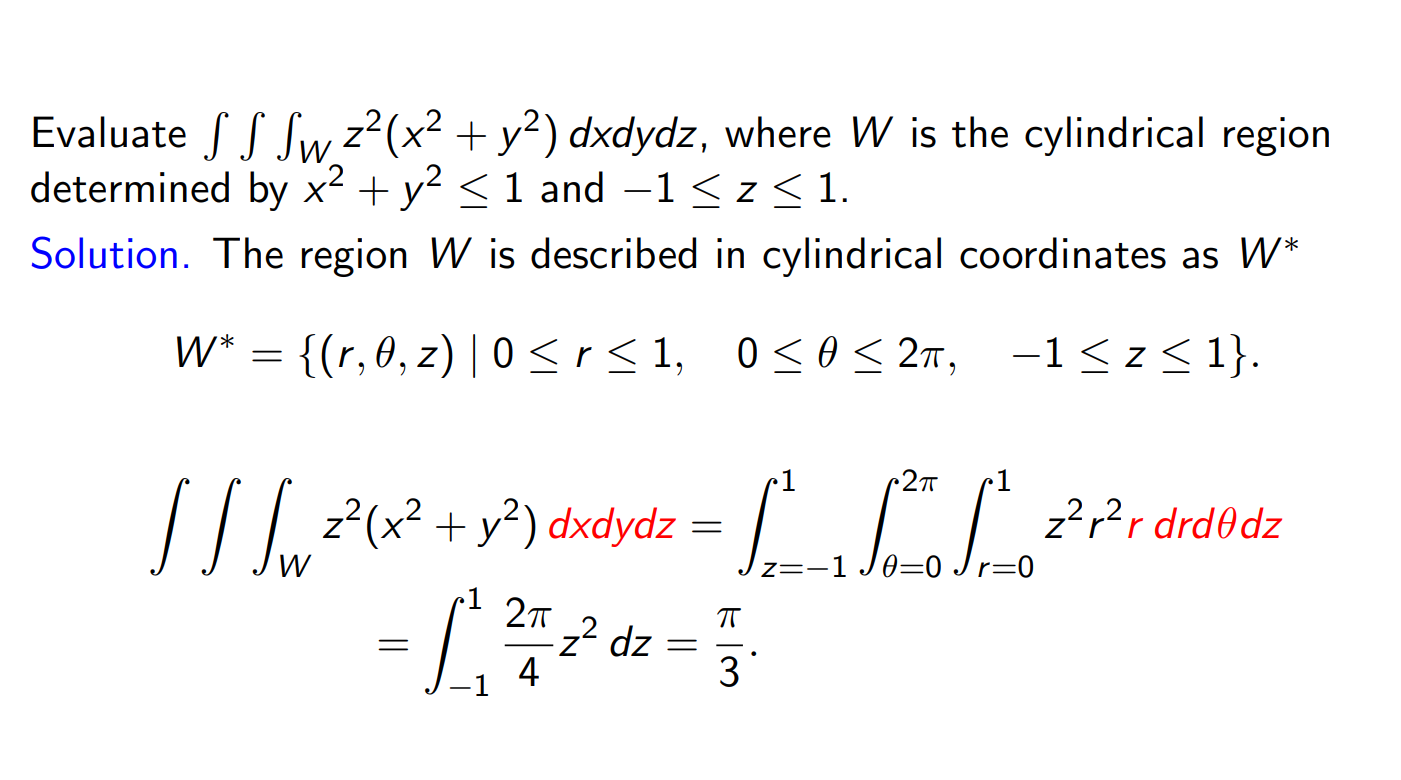

In [2]:
img2=Image.open(r'C:\Users\kani1\Desktop\IE643\digitalProof.png').convert("RGB")
pixel_values = processor(img1, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

NameError: name 'img1' is not defined

handwritten single equation
input- <br>
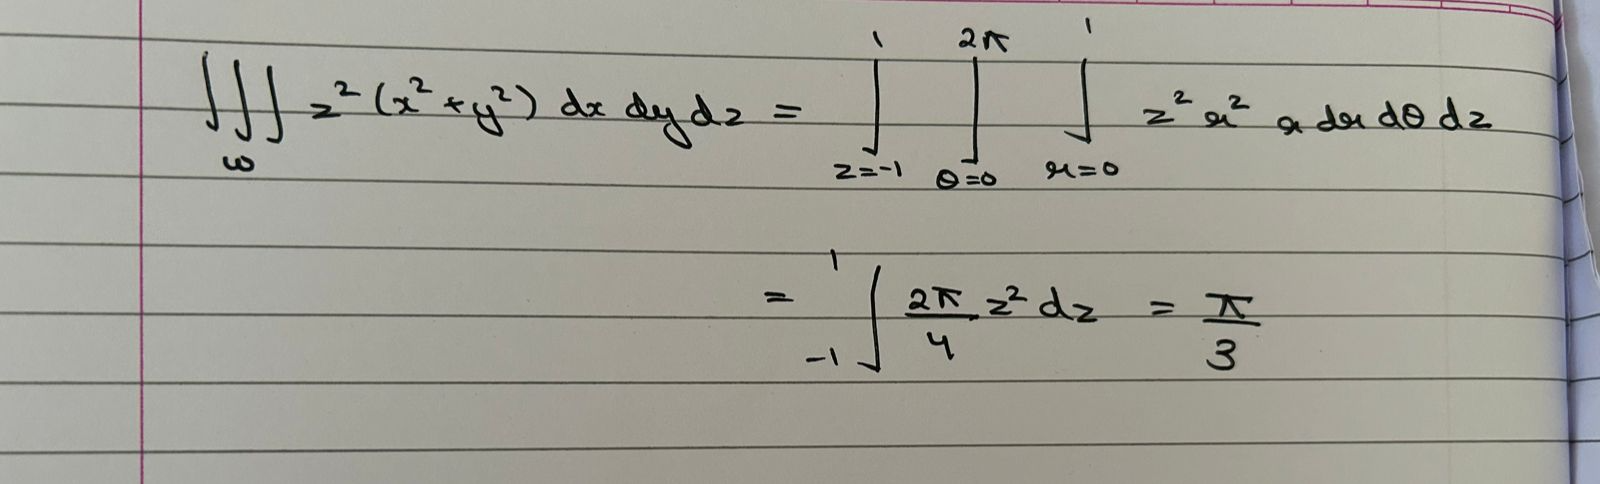

In [6]:
img3=Image.open(r'C:\Users\kani1\Desktop\IE643\kanika-handwritten-single-equation.jpg').convert("RGB")
pixel_values3 = processor(img3, return_tensors="pt").pixel_values

generated_ids3 = model.generate(pixel_values3)
generated_text3 = processor.batch_decode(generated_ids3, skip_special_tokens=True)[0]
generated_text3

'which are necessary the significance of'

handwritten equation + proof
input - <br>

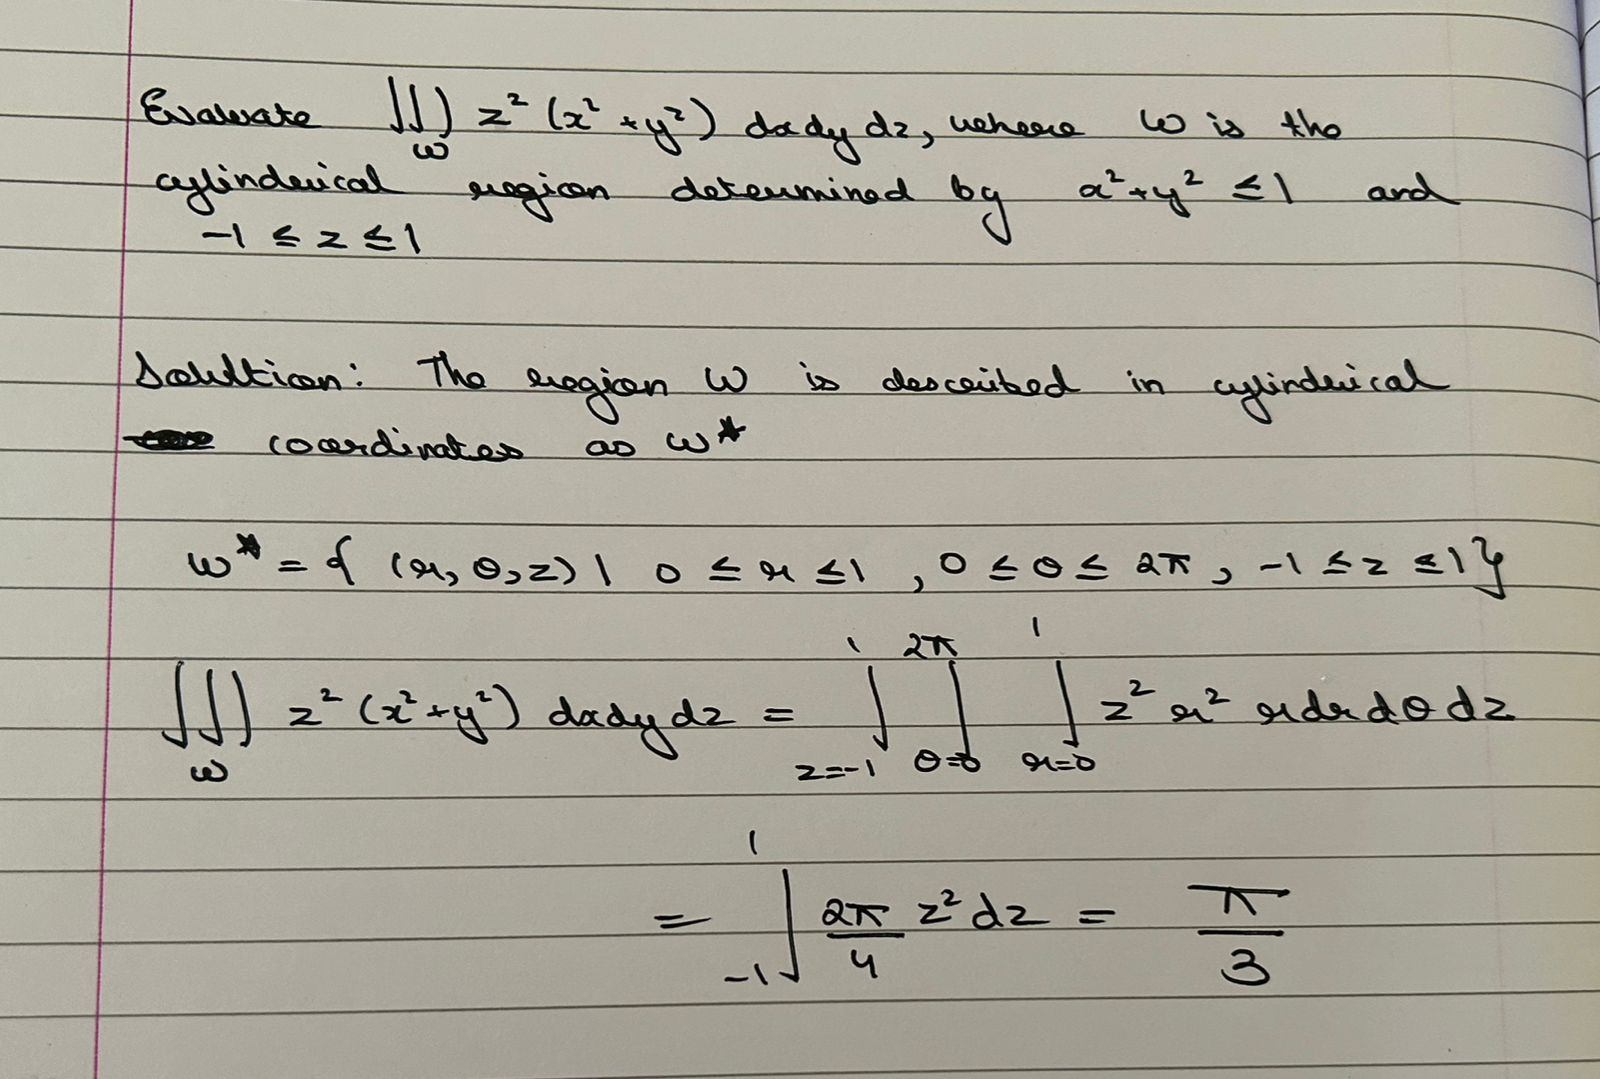

In [9]:
img4=Image.open(r'C:\Users\kani1\Desktop\IE643\kanika-handwritten-proof.jpg').convert("RGB")
pixel_values4 = processor(img4, return_tensors="pt").pixel_values

generated_ids4 = model.generate(pixel_values4)
generated_text4 = processor.batch_decode(generated_ids4, skip_special_tokens=True)[0]
generated_text4

'0 0000'